In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Load the dataset with only necessary columns
df = pd.read_csv('spam.csv', encoding='latin1', usecols=['v1', 'v2'])


In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Set Pandas display options to show full text content
pd.set_option('display.max_colwidth', None)

# Display the DataFrame to see the full text content in column 'v2'
print(df)

        v1  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                     v2  
0                                                       Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                         Ok lar... Joking wif u oni...  
2           Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                                     U dun say so early hor... U c alr

In [10]:
# Creating a DataFrame
df = pd.DataFrame(df)


In [11]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    filtered_words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return " ".join(filtered_words)

df['processed_text'] = df['v2'].apply(preprocess_text)


In [12]:
# Feature extraction using Bag-of-Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['v1']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train the model
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

In [16]:
# Predictions
predictions = classifier.predict(X_test)


In [17]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.9641255605381166

Confusion Matrix:
 [[941  24]
 [ 16 134]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.98      0.98       965
        spam       0.85      0.89      0.87       150

    accuracy                           0.96      1115
   macro avg       0.92      0.93      0.92      1115
weighted avg       0.97      0.96      0.96      1115



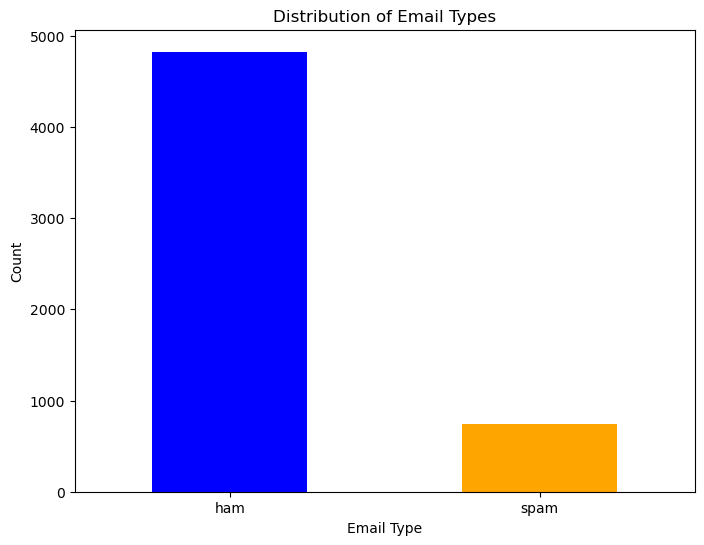

In [18]:
import matplotlib.pyplot as plt

# Count the occurrences of 'spam' and 'ham'
email_types = df['v1'].value_counts()

# Plotting a bar plot
plt.figure(figsize=(8, 6))
email_types.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Email Types')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-labels for better readability
plt.show()


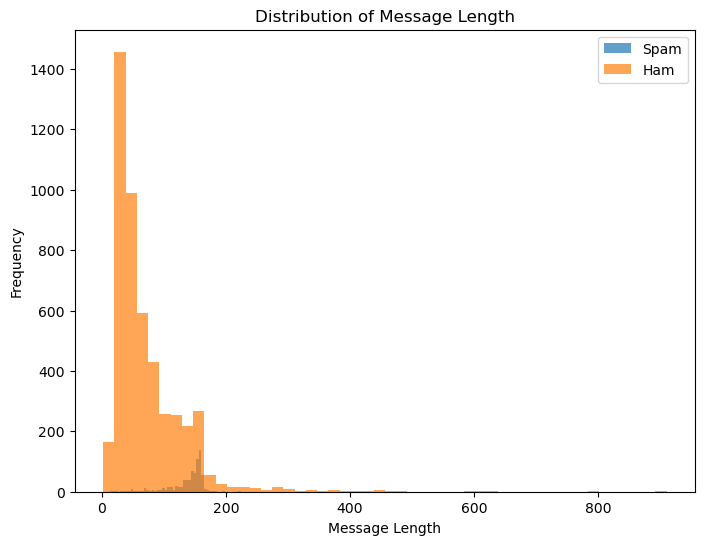

In [19]:
# Calculate the length of each message
df['message_length'] = df['v2'].apply(len)

# Plotting histograms for spam and ham emails' message lengths
plt.figure(figsize=(8, 6))
plt.hist(df[df['v1'] == 'spam']['message_length'], bins=50, alpha=0.7, label='Spam')
plt.hist(df[df['v1'] == 'ham']['message_length'], bins=50, alpha=0.7, label='Ham')
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [21]:
pip install wordcloud


     ------------------------------------ 152.1/152.1 kB 603.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


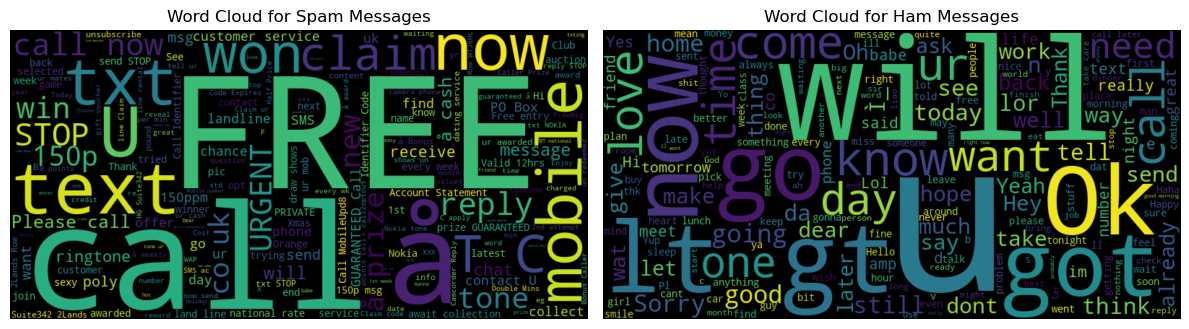

In [22]:
from wordcloud import WordCloud

# Creating separate datasets for spam and ham messages
spam_messages = ' '.join(df[df['v1'] == 'spam']['v2'])
ham_messages = ' '.join(df[df['v1'] == 'ham']['v2'])

# Generate word clouds for spam and ham messages
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=800, height=400).generate(spam_messages)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_ham = WordCloud(width=800, height=400).generate(ham_messages)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.tight_layout()
plt.show()
